In [1]:
import os
import sys

abspath = os.path.abspath
sys.path.extend([
    abspath(".."),
    abspath("../mrcnn"),
    abspath("../mrcnn/scripts")
])

from model_server.models import CocoModel, ClomaskModel
from model_server.imutils import post_process

import skimage.io
import numpy as np

/Users/havan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
output_dir = "output"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
output_dir = abspath(output_dir)

In [3]:
img_url = "../data/bottles_001.jpg"

### Coco Model

In [4]:
model = CocoModel()
model.load()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Processing 1 images
image                    shape: (1920, 1080, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -1.41976  max:    2.16878  float32

*** No instances to display *** 



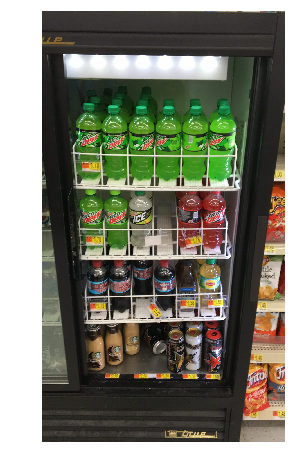

In [5]:
output_paths = model.create_mask(img_url, output_dir)

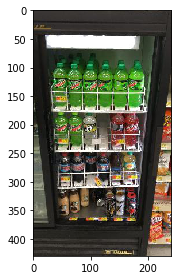

In [6]:
for op in output_paths:
    skimage.io.imshow(skimage.io.imread(op))

### Clomask Model

In [7]:
class_names = [None, 'bottle', "box", "bag"]

model = ClomaskModel(class_names)
model.load()

Processing 1 images
image                    shape: (1920, 1080, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32


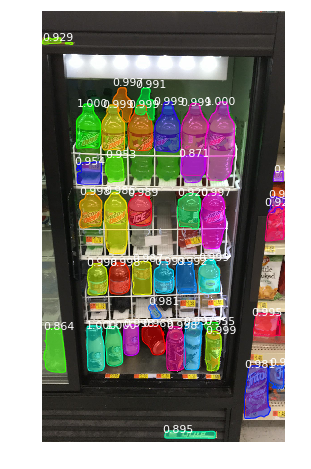

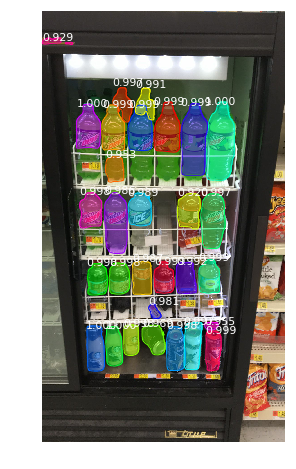

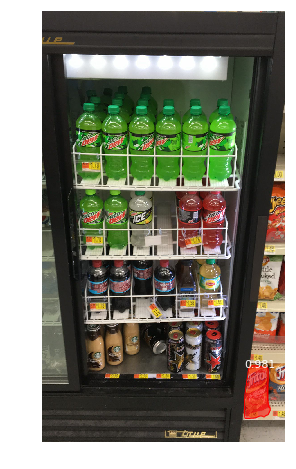

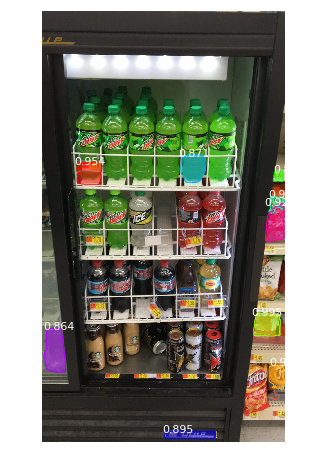

In [8]:
output_paths = model.create_mask(img_url, output_dir, generate_per_class=True)

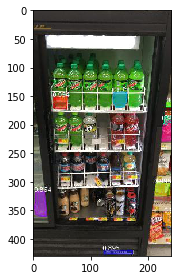

In [9]:
for op in output_paths:
    skimage.io.imshow(skimage.io.imread(op))